```mermaid
%%{ init: { 'flowchart': { 'curve': 'bumpX' } } }%%
flowchart LR
    A(工艺及介质参数)-->D(凝固传热计算)
    B(钢种热物性参数及计算条件)-->D(凝固传热计算)
    C(设备参数)-->D(凝固传热计算)
    D-->E(连铸坯温度场)
```

title：连铸区温度场模拟计算
## 钢物性参数 tab
    col1 20%
        - 浇筑钢种 selectbox
        - 浇筑温度 number_input
        - 液相线温度 number_input
        - 固相线温度 number_input
        - 热导率 number_input
        - 比热容 number_input
        - 密度 number_input
    col2 80%
        - 各项参数的显示
## 工艺及设备参数 tab
    
    - col1 15% 结晶器
      - 拉坯速度 number_input
      - 热流密度修正系数 number_input
      - 断面宽度 number_input
      - 断面厚度 number_input
      - 钢液高度 number_input
    - col2 15% 二冷区
      - 分区数目 number_input
        - 每个分区的冷却水量
        - 每个分区的冷却水温度
    - col3 70% 相关参数显示
      - 二冷区结构图形
      - 各项冷却水的水量与冷却水温度
## 计算参数 tab
    - col1 15% 计算设置
      - 空间步长
      - 时间步长
      - 初始化
      - 计算
    - col2 85% 结果显示
      - 结晶器进出口热图
      - 各二冷区分区热图

# 控制方程的理解与推导
## 核心控制方程
$$\rho c_{p} \frac{\partial T}{\partial t}=\frac{\partial }{\partial x}(\lambda \frac{\partial T}{\partial x})+\frac{\partial }{\partial y}(\lambda \frac{\partial T}{\partial y})+\frac{\partial }{\partial z}(\lambda \frac{\partial T}{\partial z})+\dot{q}$$
## 假设
- 拉坯方向的传热可以忽略，$\frac{\partial T}{\partial z}=0$，只考虑二维情况.
- 内热源作等效比热容处理，$\dot{q}=0$.
- 冷却水温度与环境温度忽略不计.
- 模拟1/4边界
## 简化后的控制方程及离散化
$$\rho \frac{\partial H}{\partial t}=\frac{\partial }{\partial x}(\lambda \frac{\partial T}{\partial x})+\frac{\partial }{\partial y}(\lambda \frac{\partial T}{\partial y})$$
### 方程左侧离散化
$$(\rho \frac{\partial H}{\partial t})_{i}^{p}=\rho\frac{H_{i}^{p+1}-H_{i}^{p}}{\Delta t}$$
### 方程右侧离散化
$$(\frac{\partial }{\partial x}(\lambda \frac{\partial T}{\partial x}))_{i}^{p}=\frac{T_{i+1}^{p}-2T_{i}^{p}+T_{i-1}^{p}}{(\Delta x)^{2}}$$
$$(\frac{\partial }{\partial x}(\lambda \frac{\partial T}{\partial x}))_{j}^{p}=\frac{T_{j+1}^{p}-2T_{j}^{p}+T_{j-1}^{p}}{(\Delta y)^{2}}$$
最终简化后的离散方程可化为:
$$H_{i}^{p+1}=H_{i}^{p}+\frac{\lambda\Delta t}{\rho(\Delta x)^{2}}(T_{i+1}^{p}-2T_{i}^{p}+T_{i-1}^{p})+\frac{\lambda\Delta t}{\rho(\Delta y)^{2}}(T_{j+1}^{p}-2T_{j}^{p}+T_{j-1}^{p})$$
## 边界条件
1.当x=0或者y=0时,为绝热边界条件.即$T_{i-1}^{p}=T_{i}^{p}$或$T_{j-1}^{p}=T_{j}^{p}$,离散方程为:
### 左边界
$$H_{i}^{p+1}=H_{i}^{p}+\frac{\lambda\Delta t}{\rho(\Delta x)^{2}}(T_{i+1}^{p}-T_{i}^{p})+\frac{\lambda\Delta t}{\rho(\Delta y)^{2}}(T_{j+1}^{p}-2T_{j}^{p}+T_{j-1}^{p})$$
### 下边界
$$H_{i}^{p+1}=H_{i}^{p}+\frac{\lambda\Delta t}{\rho(\Delta x)^{2}}(T_{i+1}^{p}-2T_{i}^{p}+T_{i-1}^{p})+\frac{\lambda\Delta t}{\rho(\Delta y)^{2}}(T_{j+1}^{p}-T_{j}^{p})$$
### 右边界
x=width/2，y!=thickness/2，对流边界条件,需要在方程右边加上对流项$(-\frac{2h\Delta t(T_{i}^{p}-T_{f}^{p})}{\rho\Delta x})$,没有了i+1项
$$H_{i}^{p+1}=H_{i}^{p}-\frac{2h\Delta t}{\rho\Delta x}(T_{i}^{p}-T_{f}^{p})+\frac{\lambda\Delta t}{\rho(\Delta y)^{2}}(T_{j+1}^{p}-2T_{j}^{p}+T_{j-1}^{p})$$
### 上边界
x!=width/2,y=thickness/2，对流边界条件需要在方程右边加上对流项$(-\frac{2h\Delta t(T_{j}^{p}-T_{f}^{p})}{\rho\Delta y})$,没有了j+1项
$$H_{j}^{p+1}=H_{j}^{p}-\frac{2h\Delta t}{\rho\Delta y}(T_{j}^{p}-T_{f}^{p})+\frac{\lambda\Delta t}{\rho(\Delta x)^{2}}(T_{i+1}^{p}-2T_{i}^{p}+T_{i-1}^{p})$$
### 右上角角点
x=width/2，y=thickness/2，没有了j+1和i+1项，添加两个对流项
$$H_{i,j}^{p+1}=H_{i,j}^{p}-\frac{2\lambda\Delta t}{\rho\Delta y}(T_{i,j-1}^{p}-T_{i,j}^{p})-\frac{2\lambda\Delta t}{\rho\Delta x}(T_{i-1,j}^{p}-T_{i,j}^{p})+\frac{\lambda\Delta t}{\rho(\Delta x)^{2}}(T_{i+1,j}^{p}-2T_{i,j}^{p}+T_{i-1,j}^{p})+\frac{\lambda\Delta t}{\rho(\Delta y)^{2}}(T_{i,j+1}^{p}-2T_{i,j}^{p}+T_{i,j-1}^{p})$$
### 说明
- $h(T_{i,j}-T_{f})可简化为热流密度\phi $

C:\Users\15755\AppData\Local\Temp\ipykernel_1048\787643108.py:128: UserWarning: Glyph 179 (\N{SUPERSCRIPT THREE}) missing from font(s) SimHei.
  plt.tight_layout()
c:\software\anaconda\envs\streamlit\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 179 (\N{SUPERSCRIPT THREE}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


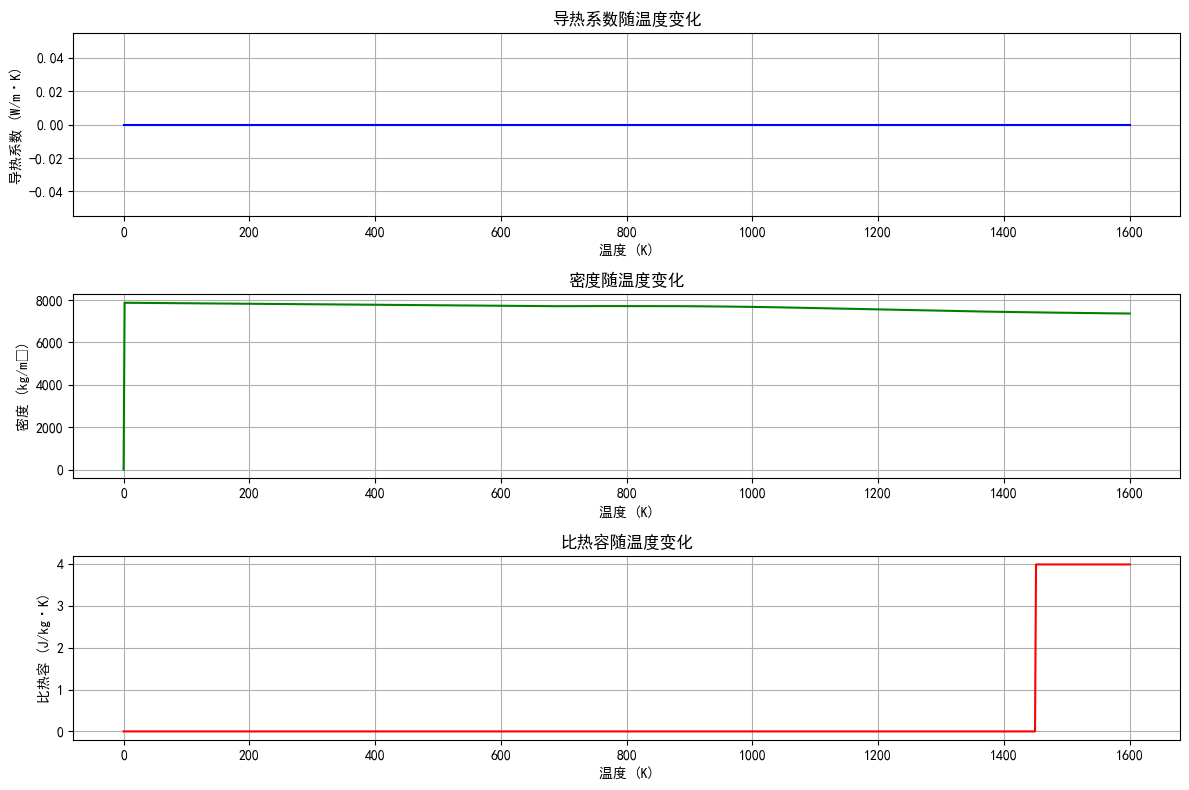

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

# 设置中文字体
plt.rcParams["font.sans-serif"] = ["SimHei"]  # 使用黑体
plt.rcParams["axes.unicode_minus"] = False  # 解决负号显示问题


class MaterialProperties:
    def get_conductivity(self, T):
        """获取导热系数(W/m·K)与温度的关系"""
        if isinstance(T, np.ndarray):
            return np.vectorize(self._get_conductivity_scalar)(T)
        return self._get_conductivity_scalar(T)

    def _get_conductivity_scalar(self, T):
        if T > 1500:
            conductivity = 7.43111111111 * math.pow(10, -5) * math.pow(
                T, 1
            ) + 7.43111111111 * math.pow(10, -3)
        elif 1500 >= T > 800:
            conductivity = 1.0084739983 * math.pow(10, -5) * math.pow(
                T, 1
            ) + 1.75096149 * math.pow(10, -2)
        elif 800 >= T > 0:
            conductivity = (
                -2.0076797386 * math.pow(10, -8) * math.pow(T, 2)
                - 1.598864379 * math.pow(10, -5) * math.pow(T, 1)
                + 5.2147908 * math.pow(10, -2)
            )
        else:
            conductivity = 0  # 默认返回固定值，可以根据需要调整
        return conductivity

    def get_density(self, T):
        """获取密度(kg/m³)与温度的关系"""
        if isinstance(T, np.ndarray):
            return np.vectorize(self._get_density_scalar)(T)
        return self._get_density_scalar(T)

    def _get_density_scalar(self, T):
        if T >= 1100:
            density = (
                4.2959176241 * math.pow(10, 0) * math.pow(T / 100, 2)
                - 1.6765194031 * math.pow(10, 2) * math.pow(T / 100, 1)
                + 8.9429828 * math.pow(10, 3)
            )
        elif 1100 > T >= 700:
            density = (
                -1.106096578 * math.pow(10, 1) * math.pow(T / 100, 2)
                + 1.783103348 * math.pow(10, 2) * math.pow(T / 100, 1)
                + 6.9950416 * math.pow(10, 3)
            )
        elif 700 >= T > 0:
            density = -2.35635949 * math.pow(10, 1) * math.pow(
                T / 100, 1
            ) + 7.867824 * math.pow(10, 3)
        else:
            density = 0  # 默认返回固定值，可以根据需要调整
        return density

    def get_specific_heat(self, T):
        """获取比热容(J/kg·K)与温度的关系"""
        if isinstance(T, np.ndarray):
            return np.vectorize(self._get_specific_heat_scalar)(T)
        return self._get_specific_heat_scalar(T)

    def _get_specific_heat_scalar(self, T):
        if T > 1450:
            specific_heat = 4.1216
        elif 1450 >= T > 800:
            specific_heat = (
                1.2929460581 * math.pow(10, -8) * math.pow(T, 2)
                - 6.8834736218 * math.pow(10, -5) * math.pow(T, 1)
                + 7.507302074 * math.pow(10, -1)
            )
        elif 800 >= T > 0:
            specific_heat = (
                1.45128205128221 * math.pow(10, -12) * math.pow(T, 4)
                - 1.78359309535809 * math.pow(10, -9) * math.pow(T, 3)
                + 8.46127450980565 * math.pow(10, -7) * math.pow(T, 2)
                + 3.2909801527044 * math.pow(10, -6) * math.pow(T, 1)
                + 4.783194 * math.pow(10, -1)
            )
        else:
            specific_heat = 0  # 默认返回固定值，可以根据需要调整
        return specific_heat


# 创建一个MaterialProperties对象
material = MaterialProperties()

# 定义温度范围
T = np.linspace(0, 1600, 1000)

# 计算导热系数、密度和比热容
conductivity = material.get_conductivity(T)
density = material.get_density(T)
specific_heat = material.get_specific_heat(T)

# 绘制导热系数随温度变化的折线图
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(T, conductivity, label="导热系数 (W/m·K)", color="b")
plt.title("导热系数随温度变化")
plt.xlabel("温度 (K)")
plt.ylabel("导热系数 (W/m·K)")
plt.grid(True)

# 绘制密度随温度变化的折线图
plt.subplot(3, 1, 2)
plt.plot(T, density, label="密度 (kg/m³)", color="g")
plt.title("密度随温度变化")
plt.xlabel("温度 (K)")
plt.ylabel("密度 (kg/m³)")
plt.grid(True)

# 绘制比热容随温度变化的折线图
plt.subplot(3, 1, 3)
plt.plot(T, specific_heat, label="比热容 (J/kg·K)", color="r")
plt.title("比热容随温度变化")
plt.xlabel("温度 (K)")
plt.ylabel("比热容 (J/kg·K)")
plt.grid(True)

plt.tight_layout()
plt.show()


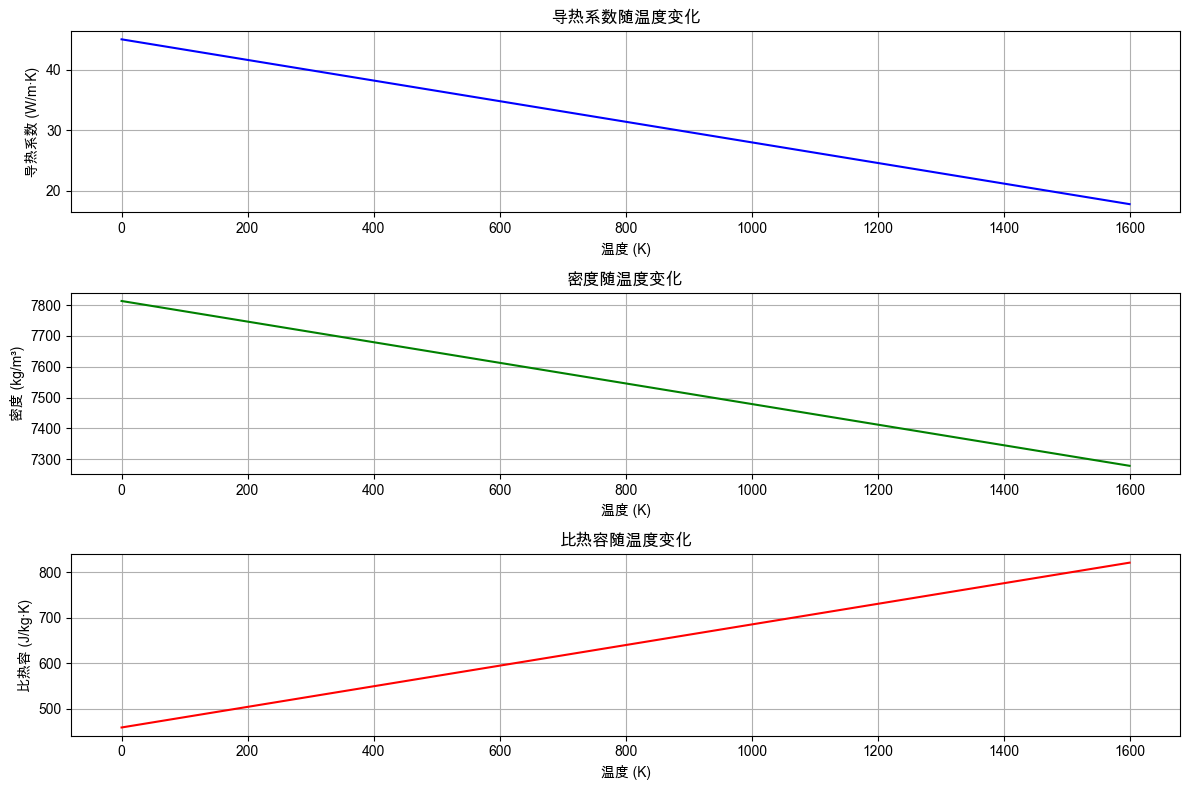

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# 定义函数
def lamda(t):
    return (0.45041 - 1.7057 / 10000 * t) * 100


def rho(t):
    return (7.8137 - 3.3481 / 10000 * t) * 1000


def c(t):
    return (0.10971 + 5.4016 / 100000 * t) * 4184


# 生成温度范围
T = np.linspace(0, 1600, 1000)

# 计算函数值
conductivity = lamda(T)
density = rho(T)
specific_heat = c(T)


# 设置中文字体
plt.rcParams["font.sans-serif"] = ["Arial Unicode MS"]  # 使用Arial Unicode MS
plt.rcParams["axes.unicode_minus"] = False  # 解决负号显示问题
# 绘制导热系数随温度变化的折线图
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(T, conductivity, label="导热系数 (W/m·K)", color="b")
plt.title("导热系数随温度变化")
plt.xlabel("温度 (K)")
plt.ylabel("导热系数 (W/m·K)")
plt.grid(True)

# 绘制密度随温度变化的折线图
plt.subplot(3, 1, 2)
plt.plot(T, density, label="密度 (kg/m³)", color="g")
plt.title("密度随温度变化")
plt.xlabel("温度 (K)")
plt.ylabel("密度 (kg/m³)")
plt.grid(True)

# 绘制比热容随温度变化的折线图
plt.subplot(3, 1, 3)
plt.plot(T, specific_heat, label="比热容 (J/kg·K)", color="r")
plt.title("比热容随温度变化")
plt.xlabel("温度 (K)")
plt.ylabel("比热容 (J/kg·K)")
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
import plotly.graph_objects as go
import numpy as np

# 生成示例数据
x = np.linspace(0, 3, 100)
y = np.linspace(0, 3, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(X) * np.cos(Y) * 100  # 生成0-100范围的数据

# 创建图像
fig = go.Figure()

# 添加热图
fig.add_trace(go.Heatmap(x=x, y=y, z=Z, colorscale="Viridis"))

# 添加自定义等值线（35和45）
fig.add_trace(
    go.Contour(
        x=x,
        y=y,
        z=Z,
        contours=dict(
            # levels=[35, 45],  # 明确指定等值线层级
            coloring="heatmap",  # 仅显示线
            showlabels=True,  # 显示数值标签
        ),
        line=dict(color="white", width=2),  # 白色粗线
        showscale=False,  # 隐藏颜色条
    )
)

# 调整布局
fig.update_layout(
    title="热图带自定义等值线（35和45）", xaxis_title="X轴", yaxis_title="Y轴"
)

fig.show()
